<a href="https://colab.research.google.com/github/bernicegolomo/DecisionTreeClassifier/blob/main/COSC5406_Assignment_2_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Task:** In this assignment, your goal is to build a Decision-Tree Classifier model to predict the safety of the car (based on the data set provided).
You are required to build two models
(a) one with criterion gini index
(b) with criterion entropy

You will then compare the performance of both models and report your findings

Data set Link : https://archive.ics.uci.edu/dataset/19/car+evaluation

(Go to the link abve and read the data set information to familiarize yourself with the data)

In [ ]:
# Installing necessary libraries
!pip install pandas scikit-learn numpy matplotlib seaborn ucimlrepo category_encoders graphviz pydotplus





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.1 MB/s eta 0:00:00


# **# Task: Import Libraries**

In [ ]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, metrics, tree

import seaborn as sns
# Visualization libraries
import matplotlib.pyplot as plt

# Import the category_encoders library
import category_encoders as ce


# **# Task: Import Data Set**


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets



# Task: Perform Exploratory Data Analysis (e.g.,)
(i) dimensions of the data set
# (ii) Top 5 rows of the data set

In [ ]:
# (i) dimensions of the data set
X_dimensions = X.shape
y_dimensions = y.shape

print("Dimensions of features (X):", X_dimensions)
print("Dimensions of target (y):", y_dimensions)

# (ii) Top 5 rows of the data set
styled_df = X.head().style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_table_styles([{'selector': 'thead th',
                        'props': [('background-color', '#4CAF50'), ('color', 'white'),
                                  ('text-align', 'left'), ('font-weight', 'bold')]}]) \
    .set_properties(**{'text-align': 'left'})

styled_df

Dimensions of features (X): (1728, 6)
Dimensions of target (y): (1728, 1)


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


# **# Task: Rename the columns as follows: col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] to give proper names and then display the data again**

In [ ]:
# Rename the columns of X
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X.columns = col_names

y_df = pd.DataFrame(y, columns=['class'])

# Concatenate X and y into a single DataFrame
car_data = pd.concat([X, y_df], axis=1)

# Display the updated DataFrame with styling
styled_car_data = car_data.head().style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_table_styles([{'selector': 'thead th',
                        'props': [('background-color', '#4CAF50'), ('color', 'white'),
                                  ('text-align', 'left'), ('font-weight', 'bold')]}]) \
    .set_properties(**{'text-align': 'left'})

styled_car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# **# Task: Provide a summary (info) of the data set**

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# **Task: Provide a summary of the variables (which are categorical, which are ordinal). Which is the target variable (label?)**

In [ ]:
# Summary of variables
def summarize_variables(df):
    categorical = ['buying', 'maint', 'doors', 'persons', 'safety', 'lug_boot']
    ordinal = []
    target = 'class'

    print("Categorical Variables (Nominal):", categorical)
    print("Ordinal Variables:", ordinal)
    print("Target Variable (Label):", target)



# Call the function
summarize_variables(car_data)

print()
print("Reason why these features are categorical:")
print()
print(" - 'buying and maint: It describes the price range for buying a car and represents different levels of maintenance costs respectively, named categories like 'vhigh', 'high', 'med', and 'low'")
print(" - 'doors and persons: Although it refers to the number of doors a car has and seating capacity, it is treated as categorical because the values are limited to specific categories: '2', '3', '4', and '5more' ")
print(" - 'lug_boot: This feature categorizes the car's safety into 'low', 'med', and 'high', representing safety levels.")
print(" - 'safety: It categorizes the luggage capacity of the car into 'small', 'med', and 'big' which are qualitative descriptors ")
print()
print()



Categorical Variables (Nominal): ['buying', 'maint', 'doors', 'persons', 'safety', 'lug_boot']
Ordinal Variables: []
Target Variable (Label): class

Reason why these features are categorical:

 - 'buying and maint: It describes the price range for buying a car and represents different levels of maintenance costs respectively, named categories like 'vhigh', 'high', 'med', and 'low'
 - 'doors and persons: Although it refers to the number of doors a car has and seating capacity, it is treated as categorical because the values are limited to specific categories: '2', '3', '4', and '5more' 
 - 'lug_boot: This feature categorizes the car's safety into 'low', 'med', and 'high', representing safety levels.
 - 'safety: It categorizes the luggage capacity of the car into 'small', 'med', and 'big' which are qualitative descriptors 




# **Task: What are the characteristics of the "target" variable. (categorical/ordinal). Any other information?**

In [ ]:
print("Characteristics of the Target Variable ('class'):\n")

print("1. Type:")
print("  - The target variable class is categorical (nominal).")

print("\n2. Reason:")
print("   - The categories (unacc, acc, good, vgood) represent distinct labels of car acceptability but do not have an inherent order or ranking.")

print("\n3. Values:")
print("   - There are four unique categories: unacc, acc, good, and vgood.")

print("\n4. Cardinality:")
print("   - Low cardinality, since there are only four distinct values.")

print()
missing_values = car_data['class'].isnull().sum()
print(f"Number of missing values in 'class' column: {missing_values}")

# Summary of the target variable
target_summary = car_data['class'].describe()
print(target_summary)


Characteristics of the Target Variable ('class'):

1. Type:
  - The target variable class is categorical (nominal).

2. Reason:
   - The categories (unacc, acc, good, vgood) represent distinct labels of car acceptability but do not have an inherent order or ranking.

3. Values:
   - There are four unique categories: unacc, acc, good, and vgood.

4. Cardinality:
   - Low cardinality, since there are only four distinct values.

Number of missing values in 'class' column: 0
count      1728
unique        4
top       unacc
freq       1210
Name: class, dtype: object


# **Task: Check for any missing values in the data**

In [ ]:
missing_values = car_data.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


# **Task: Declare feature vector and target variable (Data frames)**

In [ ]:
# Features (all columns except 'class')
X = car_data.drop(columns='class')

# Target variable (class)
y = car_data['class']


print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

Target Variable (y):
0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object


# **Task: Split data into separate training and test set**
You can import "train_test_split" from sklearn.model_selection

# What is the shape of your train/test split? **bold text**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Print the shapes of the resulting sets to verify
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (1382, 6)
Testing set shape (X_test): (346, 6)
Training set shape (y_train): (1382,)
Testing set shape (y_test): (346,)


# **Task: Feature Engineering**
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

    Steps to do the feature engineering:
(i) check the data types of variables

---


(ii) Encode categorical variables (into numerical representation) like 0 or 1. To achieve this you can use "category encoder" library

---


(iii) import category encoders

---


(iv) encode variables with ordinal encoding

---


(v) Apply that encoding on your train and test data

---



Example output should be like table shown above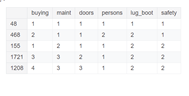


In [ ]:
print("\Check the data types of variables: Data types allow us to identify categorical variables that need encoding.")
print(car_data.dtypes)

# Define the mapping for ordinal variables
ordinal_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
ordinal_mapping = [
    {'col': 'buying', 'mapping': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}},
    {'col': 'maint', 'mapping': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}},
    {'col': 'doors', 'mapping': {'2': 1, '3': 2, '4': 3, '5more': 4}},
    {'col': 'persons', 'mapping': {'2': 1, '4': 2, 'more': 3}},
    {'col': 'lug_boot', 'mapping': {'small': 1, 'med': 2, 'big': 3}},
    {'col': 'safety', 'mapping': {'low': 1, 'med': 2, 'high': 3}}
]

# Instantiate the ordinal encoder
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

# (v) Apply encoding on train and test data
X_train_encoded = ordinal_encoder.fit_transform(X_train)
X_test_encoded = ordinal_encoder.transform(X_test)


# Output the encoded data
print("\nEncoded Training Data (first 5 rows):")
print(X_train_encoded.head())

print("\nEncoded Test Data (first 5 rows):")
print(X_test_encoded.head())





\Check the data types of variables: Data types allow us to identify categorical variables that need encoding.
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Encoded Training Data (first 5 rows):
      buying  maint  doors  persons  lug_boot  safety
107        4      4      4        3         3       3
901        2      4      2        2         1       2
1709       1      1      4        1         3       3
706        3      2      3        1         2       2
678        3      2      2        1         2       1

Encoded Test Data (first 5 rows):
      buying  maint  doors  persons  lug_boot  safety
599        3      3      3        1         2       3
1201       2      1      1        2         2       2
628        3      3      4        1         3       2
1498       1      3      4        2         2       2
1263       2      1      3        3         2       1


Now, you have training and test set ready for model building.

# ***Task: Build a Decision Tree Classifier with criterion gini index ***



In [ ]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Step 2: Initialize the Decision Tree Classifier with Gini index
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Step 3: Fit the model to the training data
dt_classifier.fit(X_train_encoded, y_train)

# Step 4: Display the fitted model's attributes
print("Number of Leaves:", dt_classifier.get_n_leaves())
print("Max Depth of the Tree:", dt_classifier.get_depth())





Number of Leaves: 66
Max Depth of the Tree: 12


# Task: Once the model is built,Predict the Test set results with criterion gini index

# Task: Check accuracy score with criterion gini index

In [ ]:
# Step 1: Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Make predictions on the test data
y_test_pred = dt_classifier.predict(X_test_encoded)

# Step 3: Calculate the accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 4: Display the accuracy score
print("Accuracy Score with Gini Index:", test_accuracy)



Accuracy Score with Gini Index: 0.9653179190751445


# Task: Compare the train-set and test-set accuracy

In [ ]:
# Step 1: Predict the training set results
y_train_pred = dt_classifier.predict(X_train_encoded)

# Step 2: Check the train-set accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train-set Accuracy with Gini Index:", train_accuracy)

# Step 4: Check the test-set accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test-set Accuracy with Gini Index:", test_accuracy)


Train-set Accuracy with Gini Index: 1.0
Test-set Accuracy with Gini Index: 0.9653179190751445


# Task: Report your findings. Is there any overfitting or underfitting?

In [ ]:
print("\nOverfitting Possibility:")
print()
answer = '''The training accuracy is 1.0, it could mean that the model has memorized the training data rather than
learning general patterns.
However, the test accuracy is still very high at 96.5%, so I think while overfitting may be a concern,
it has not drastically harmed generalization to new data in this case because there are no much difference in
the train and test accuracy.
'''

print(answer)


Overfitting Possibility:

The training accuracy is 1.0, it could mean that the model has memorized the training data rather than
learning general patterns.
However, the test accuracy is still very high at 96.5%, so I think while overfitting may be a concern,
it has not drastically harmed generalization to new data in this case because there are no much difference in
the train and test accuracy.



# Extra (Optional): Visualize the Decision Tree (You can explore sklearn library and graphviz library for that)[link text](https://)

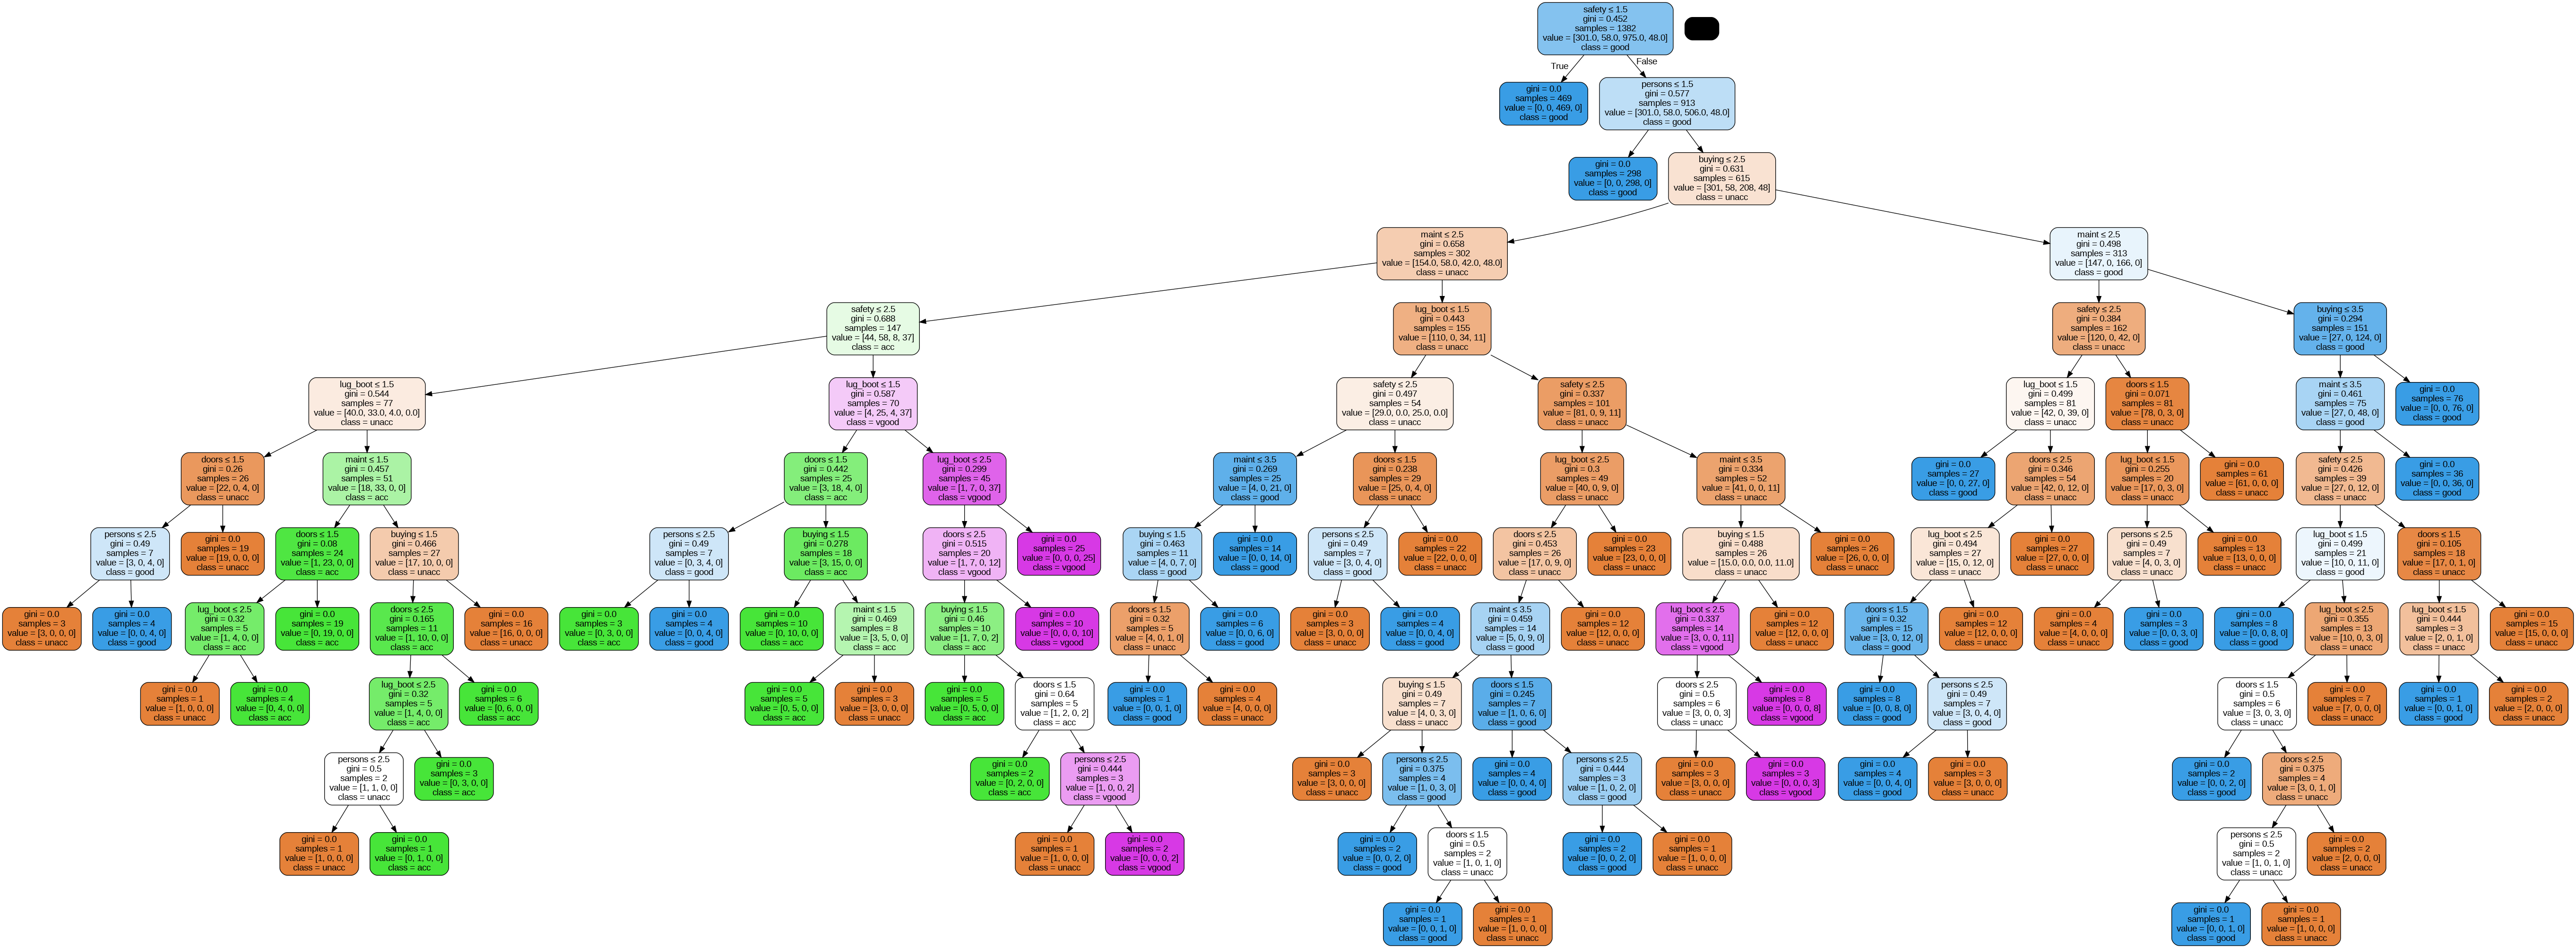

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree as dot data
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X_train_encoded.columns,
                           class_names=['unacc', 'acc', 'good', 'vgood'],
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to create a graph from dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph.render("decision_tree", format="png")
graph.view()

# Convert the dot data to an image and display it
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())




# Task:(Extra Bonus), Build teh classifier using the criteria "Entropy"

In [ ]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# adding more hyperparameters so I can get a better model
dt_entropy_classifier = DecisionTreeClassifier(criterion='entropy',
                                               max_depth=10,
                                               min_samples_split=4,
                                               min_samples_leaf=2,
                                               random_state=42)


# Step 3: Fit the model to the training data
dt_entropy_classifier.fit(X_train_encoded, y_train)

# Step 4: Predict the test set results
y_pred_entropy = dt_entropy_classifier.predict(X_test_encoded)

# Step 5: Check the accuracy of the model on training and test sets
train_accuracy_entropy = dt_entropy_classifier.score(X_train_encoded, y_train)
test_accuracy_entropy = dt_entropy_classifier.score(X_test_encoded, y_test)


print(type(X_train_encoded))
print(X_train_encoded.columns)  # This will work if it's a DataFrame


# Print the accuracy
print(f"Train-set Accuracy with Entropy: {train_accuracy_entropy}")
print(f"Test-set Accuracy with Entropy: {test_accuracy_entropy}")

# Step 6: Print classification report and confusion matrix
print("\nClassification Report with Entropy:")
print(classification_report(y_test, y_pred_entropy))

print("\nConfusion Matrix with Entropy:")
print(confusion_matrix(y_test, y_pred_entropy))

print(y_train.unique())  # Check what the class names should be


# Step 7: Visualize the Decision Tree
dot_data = export_graphviz(
    dt_entropy_classifier,
    out_file=None,
    feature_names=X_train_encoded.columns,
    class_names=['unacc', 'acc', 'vgood', 'good'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)
graph.render("decision_tree_entropy", format="png")

# Display the tree
graph.view()

# Convert the dot data to an image and display it
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

observation = '''
Using the enthropy criteria and additional hyperparameters
(max-depth, min-samples-split and min-samples-leaf) impacted the training accuracy
by dropping it slightly from 1.0 to 0.994. By reducing the train accuracy slightly,
the model is learning better general patterns rather than memorizing the data.
'''



<class 'pandas.core.frame.DataFrame'>
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Train-set Accuracy with Entropy: 0.9942112879884226
Test-set Accuracy with Entropy: 0.9624277456647399

Classification Report with Entropy:
              precision    recall  f1-score   support

         acc       0.99      0.89      0.94        83
        good       0.50      0.91      0.65        11
       unacc       1.00      1.00      1.00       235
       vgood       0.93      0.82      0.88        17

    accuracy                           0.96       346
   macro avg       0.85      0.91      0.86       346
weighted avg       0.97      0.96      0.97       346


Confusion Matrix with Entropy:
[[ 74   8   1   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   2   0  14]]
['unacc' 'acc' 'vgood' 'good']
